In [1]:
import os
os.chdir("..")

import seaborn as sns

from sim import League, run_monte_carlo, params

In [5]:
params.MATCHMAKING_SPREAD = 6
l = League()
l.run_season()
team_df, player_df = l.to_dataframes()
player_df["batting_average"] = player_df["hits"] / player_df["at_bats"]
display(player_df)

,team,scale,attr_0,attr_1,attr_2,attr_3,at_bats,hits,is_pitcher,batting_average
0,1,0.5,0.403279,0.453997,0.889128,0.618985,670,130,True,0.194030
1,1,0.5,0.919163,0.233314,0.755367,0.240367,657,117,True,0.178082
2,1,0.5,0.577118,0.799109,0.547121,0.857222,669,129,True,0.192825
3,1,0.5,0.246507,0.553844,0.462949,0.826661,711,171,True,0.240506
4,1,0.5,0.721160,0.600179,0.626324,0.399953,653,113,True,0.173047
...,...,...,...,...,...,...,...,...,...,...
1495,100,0.5,0.744258,0.592665,0.793301,0.353922,339,85,False,0.250737
1496,100,0.5,0.199474,0.946512,0.058990,0.883466,332,57,False,0.171687
1497,100,0.5,0.354077,0.988695,0.130422,0.121881,324,70,False,0.216049
1498,100,0.5,0.598518,0.730398,0.558664,0.704148,320,78,False,0.243750


Correlation for attr_0: 0.697
Correlation for attr_1: 0.359
Correlation for attr_2: 0.065
Correlation for attr_3: 0.010


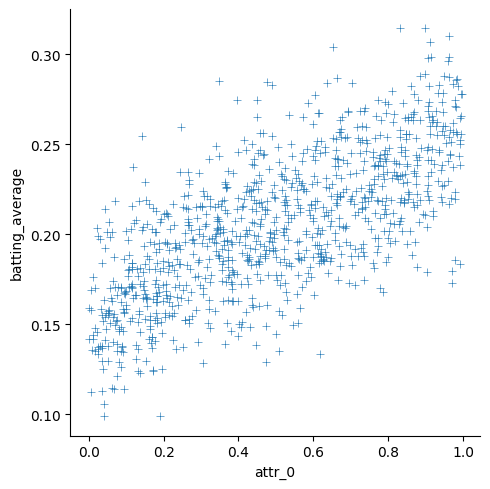

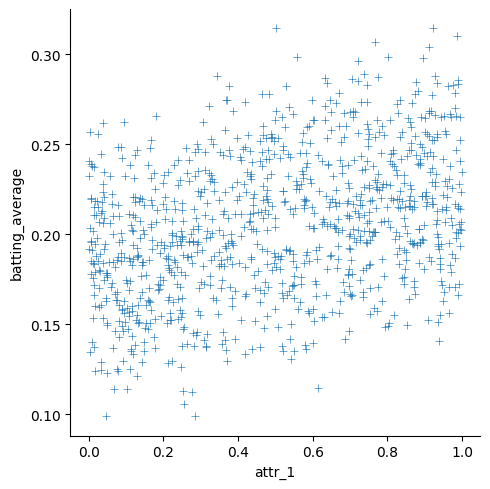

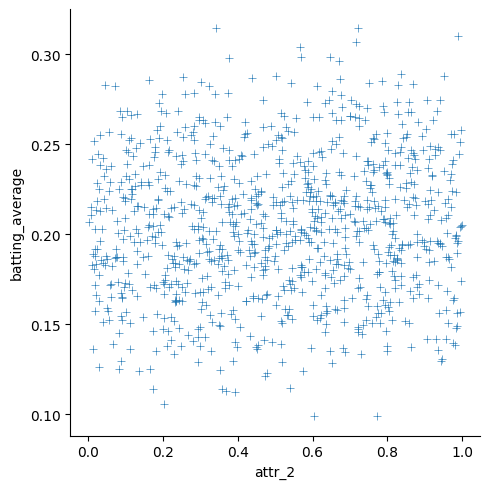

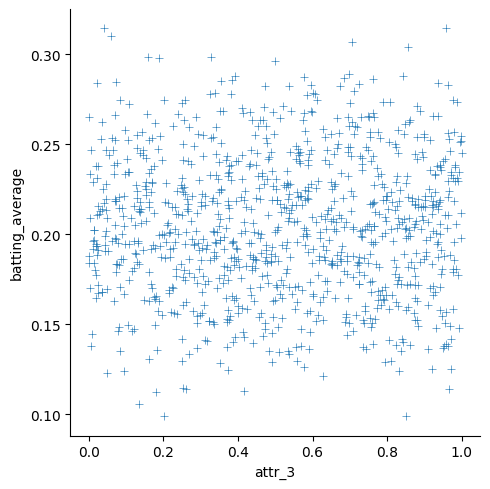

In [6]:
batters = player_df.loc[player_df["is_pitcher"] == False]
for attr in [f"attr_{i}" for i in range(4)]:
    p = sns.relplot(data=batters, x=attr, y="batting_average", s=30, marker="+")
    print(f"Correlation for {attr}: {batters[[attr, 'batting_average']].corr().iat[0, 1]:.3f}")

Correlation for attr_0: 0.735
Correlation for attr_1: 0.377
Correlation for attr_2: 0.140
Correlation for attr_3: 0.026


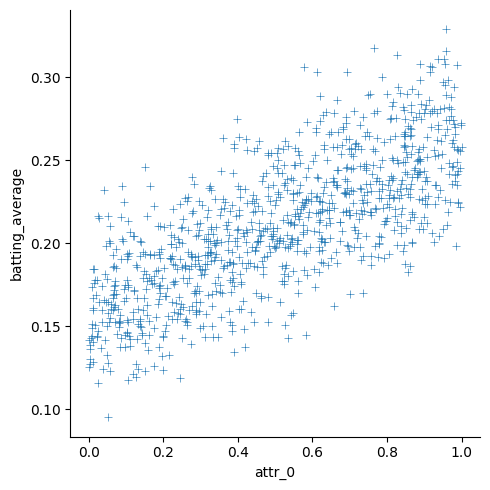

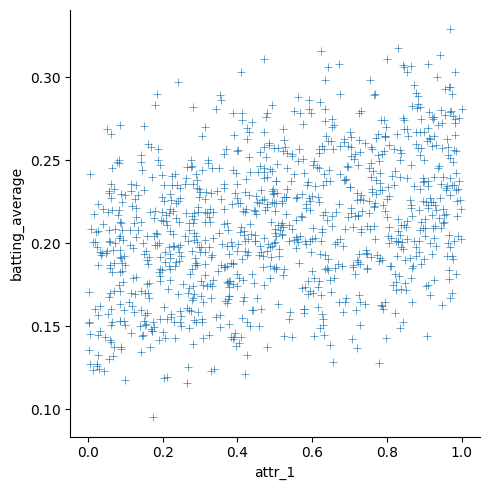

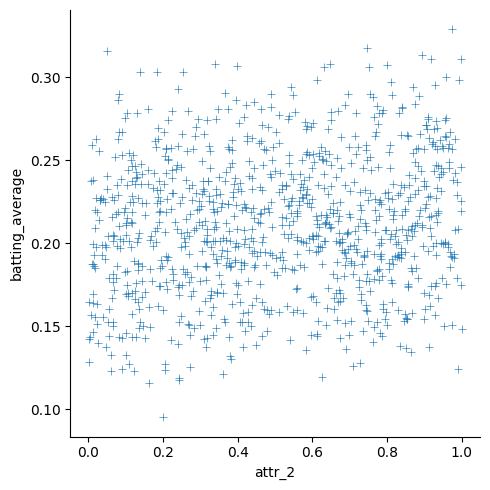

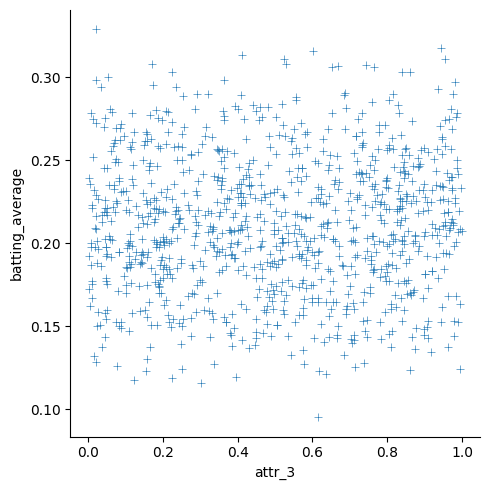

In [7]:
params.MATCHMAKING_SPREAD = 100
l = League()
l.run_season()
team_df, player_df = l.to_dataframes()
player_df["batting_average"] = player_df["hits"] / player_df["at_bats"]

batters = player_df.loc[player_df["is_pitcher"] == False]
for attr in [f"attr_{i}" for i in range(4)]:
    p = sns.relplot(data=batters, x=attr, y="batting_average", s=30, marker="+")
    print(f"Correlation for {attr}: {batters[[attr, 'batting_average']].corr().iat[0, 1]:.3f}")